# AdaBoost Algorithm
Dataset: Titanic</b>

Assignment Questions:<br>

1. Use the attached titanic data
2. Apply EDA for the dataset
3. Apply AdaBoost algorithm for predicting the survival of the passengers

## Importing Libraries

In [1]:
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Importing Dataset

In [2]:
# loading the train dataset
train = pd.read_csv('./data/titanic_train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# loading the test dataset
test = pd.read_csv('./data/titanic_test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
# loading the survived feature from the test dataset
survived = pd.read_csv('./data/titanic_labels_extracted.csv')
survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [5]:
# checking the shape of the train dataset
print(train.shape)
print(test.shape)
print(survived.shape)

(891, 12)
(418, 11)
(418, 2)


In [6]:
# checking the info of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# checking null values in the train dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Exploratory Data Analysis

<AxesSubplot:>

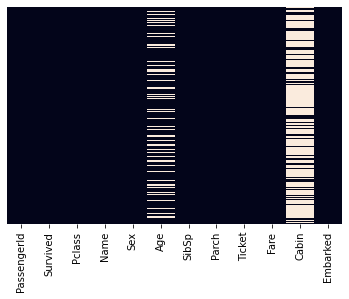

In [8]:
# plotting the heatmap to check for null values
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

<AxesSubplot:xlabel='Survived', ylabel='count'>

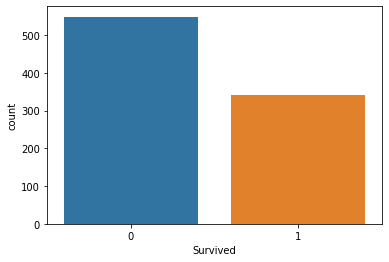

In [9]:
# plotting the barplot to check the number of people survived
sns.countplot(x='Survived', data=train)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

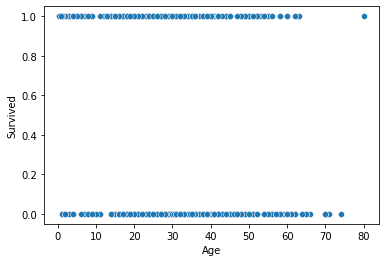

In [10]:
# plotting the scatterplot to check the number of people survived based on their age
sns.scatterplot(x='Age', y='Survived', data=train)

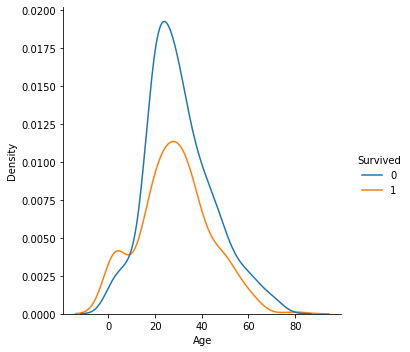

In [11]:
# plotting the graph to check the number of people survived and not survived based on their age
sns.displot(x='Age', hue='Survived', data=train, kind='kde')

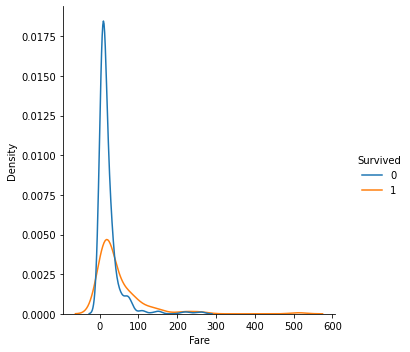

In [12]:
# plotting the graph to check the number of people survived and not survived based on their fare
sns.displot(x='Fare', hue='Survived', data=train, kind='kde')

<AxesSubplot:xlabel='Age', ylabel='Fare'>

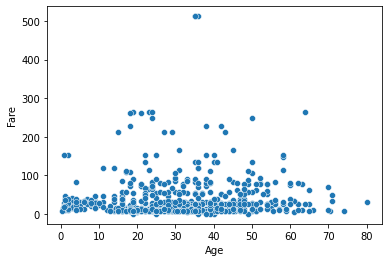

In [13]:
sns.scatterplot(x='Age', y='Fare', data=train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

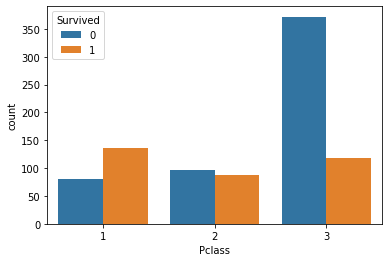

In [14]:
# plotting the graph to check the number of people survived and not survived based on their class
sns.countplot(x='Pclass', hue='Survived', data=train)

## Data Preprocessing

In [15]:
# dropping the cabin column from the train dataset
train.drop('Cabin', axis=1, inplace=True)

# dropping the cabin column from the test dataset
test.drop('Cabin', axis=1, inplace=True)

### Handling Missing Values

In [16]:
# filling the missing values in the age column with the mean of the age column
train['Age'].fillna(train['Age'].mean(), inplace=True)
test['Age'].fillna(test['Age'].mean(), inplace=True)

# filling the missing values in the embarked column with the mode of the embarked column
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)

# filling the missing values in the fare column with the mean of the fare column
test['Fare'].fillna(test['Fare'].mean(), inplace=True)

### Handling Categorical Data

In [17]:
# converting the categorical data in the embarked column to numerical data
train['Embarked'] = train['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

### Encoding Gender Column

In [18]:
# Using labelencoder to encode gender column
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train['Sex'] = le.fit_transform(train["Sex"])
test['Sex'] = le.fit_transform(test["Sex"])

## Train Test Split

In [19]:
# assigning the features to X
X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis=1)
# assigning the target to y
y = train['Survived']

# splitting the dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## AdaBoost Algorithm

### Importing the AdaBoostClassifier


In [20]:
from sklearn.ensemble import AdaBoostClassifier

### Creating the AdaBoostClassifier object

In [21]:
ada = AdaBoostClassifier(base_estimator=None, n_estimators=100, learning_rate=1.0)
ada.fit(X_train, y_train)

AdaBoostClassifier(n_estimators=100)

### Predicting the test set results

In [22]:
y_pred = ada.predict(X_test)

### Checking the accuracy score

In [23]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.8212290502793296


In [24]:
# checking the accuracy score of the train dataset
print(ada.score(X_train, y_train))

0.848314606741573


In [25]:
# checking the accuracy score of the test dataset
print(ada.score(X_test, y_test))

0.8212290502793296


## Predicting on test dataset

In [26]:
# assigning the features to X
X = test.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# predicting the survived feature
y_pred = ada.predict(X)

# creating a dataframe with the passengerid and survived feature
submission = pd.DataFrame({'PassengerId': test['PassengerId'], 'Survived': y_pred})
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,0


In [27]:
survived.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [28]:
# Checking the accuracy score of the test dataset with the survived dataframe
print(accuracy_score(survived['Survived'], y_pred))

0.9138755980861244
